# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [3]:
print("<Сиды фиксируются для воспроизводимости результатов при проверке>")

<Сиды фиксируются для воспроизводимости результатов при проверке>


<font color='#FF6670'> Ниже по ходу анализа и обучения моделей я сохраняла численные данные (скейлер, медианы, кодирование признаков, веса модели) - эти ячейки будут закомментированы </font>

# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [87]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)


Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [89]:
# df_test.drop(columns='selling_price').to_csv('test_csv_api.csv', index=0)

(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [7]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [8]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [9]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [11]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [12]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [13]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

<font color='#FF6670'> Пропущенные значения есть в колонках mileage, engine, max_power, torque, seats </font>

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [14]:
df_train.drop(columns='selling_price').duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [15]:
df_train.loc[df_train.drop(columns='selling_price').duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [16]:
# удалим полные дубликаты
df_train.drop_duplicates(inplace=True)

# удвлим признаковые дубликаты, оставляя первые
df_train.drop_duplicates(subset=df_train.drop(columns='selling_price').columns, keep='first', inplace=True)

In [17]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [18]:
df_train.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [19]:
# обрабатываем колонку torque
import re

def torque_split(text: str) -> tuple:
    if text == text:
        finds = re.findall(r'[0-9,.\-\+\/]+', text)
        if len(finds) <= 1:
            torque = finds[0]
            max_torque_rpm = None
        else:
            if 'kgm' in text:
                try:
                    torque = float(finds[0])*9.80665
                except:
                    print(float(finds[0]))
            else:
                torque = float(finds[0])
            if '+/-' in finds[1]:
                max_torque_rpm = finds[1].split('+/-')[0].replace(",", "")
            elif '-' in finds[1]:
                max_torque_rpm = finds[1].split('-')[1].replace(",", "")
            elif '/' in finds[1]:
                max_torque_rpm = finds[1].replace('/','')

            else:
                max_torque_rpm = finds[1].replace(",", "")
        return (torque, max_torque_rpm)

df_train['tuples'] = df_train['torque'].apply(torque_split)
df_train[['torque', 'max_torque_rpm']]  = pd.DataFrame(df_train['tuples'].tolist(), index=df_train.index)
df_train.drop(columns='tuples', inplace=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190.0,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250.0,5.0,2500
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,219.66896,5.0,2750
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,112.776475,5.0,4500
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75,5.0,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1,5.0,3000
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90.0,5.0,3500
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7,5.0,4000
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,235.3596,5.0,2750


In [20]:
float_cols = ['mileage', 'engine', 'max_power', 'torque','max_torque_rpm']

In [21]:
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].apply(lambda x: x.split(' ')[0] if type(x)!=float else x) # оставляем только числа

In [22]:
df_train.replace('', np.nan, inplace=True) # заменили все пустые строки на NaN

In [23]:
# приводим к типу float
df_train[float_cols] = df_train[float_cols].astype('float')

### Проделываем все то же самое с тестовым датасетом

In [24]:
df_test['tuples'] = df_test['torque'].apply(torque_split)
df_test[['torque', 'max_torque_rpm']]  = pd.DataFrame(df_test['tuples'].tolist(), index=df_test.index)
df_test.drop(columns='tuples', inplace=True)
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260.0,7.0,2200
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260.0,5.0,2750
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172.0,5.0,4300
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200.0,5.0,1750
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96.0,5.0,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04,5.0,4500
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7,5.0,4000
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,219.66896,5.0,2750
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8,5.0,4000


In [25]:
for col in ['mileage', 'engine', 'max_power']:
    df_test[col] = df_test[col].apply(lambda x: x.split(' ')[0] if type(x)!=float else x) # оставляем только числа

In [26]:
df_test.replace('', np.nan, inplace=True) # заменили все пустые строки на NaN

In [27]:
# приводим к типу float
df_test[float_cols] = df_test[float_cols].astype('float')

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [28]:
# так как у нас появились новые колонки, посмотрим на кол-ва пропусков по столбцам заново
df_train.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           186
engine            186
max_power         184
torque            187
seats             186
max_torque_rpm    197
dtype: int64

In [29]:
df_test.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage           19
engine            19
max_power         19
torque            19
seats             19
max_torque_rpm    23
dtype: int64

In [30]:
na_cols = ['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

df_train[na_cols] = df_train[na_cols].fillna(df_train[na_cols].median())
df_test[na_cols] = df_test[na_cols].fillna(df_train[na_cols].median())

In [31]:
# df_train[na_cols].median().to_pickle('medians')


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [32]:
print("<Значения переменной seats имеют некоторый порядок: то есть, например, одно сиденье это явно меньше чем 5, \nпоэтому кажется, что рассматривать ее значения как отдельные tratment groups, \nкоторые не имеют никакого отношения к цифрам 1, 2, 3, 4.. не имеет смысла. \nОднако, в контексте изучаемых объектов (машин) количество сидений говорить не просто больше-меньше, \nа говорит о классе машины. То есть если в машине 10 сидений, это вряд ли обычный седан. \nА вот классы машин уже не упорядочены друг по отношению к другу: мы не можем однозначно сравнить мини-вэн и седан. \nПоэтому, вероятно, имело смысл сделать переменную категориальной.>")

<Значения переменной seats имеют некоторый порядок: то есть, например, одно сиденье это явно меньше чем 5, 
поэтому кажется, что рассматривать ее значения как отдельные tratment groups, 
которые не имеют никакого отношения к цифрам 1, 2, 3, 4.. не имеет смысла. 
Однако, в контексте изучаемых объектов (машин) количество сидений говорить не просто больше-меньше, 
а говорит о классе машины. То есть если в машине 10 сидений, это вряд ли обычный седан. 
А вот классы машин уже не упорядочены друг по отношению к другу: мы не можем однозначно сравнить мини-вэн и седан. 
Поэтому, вероятно, имело смысл сделать переменную категориальной.>


In [33]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype('int')

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

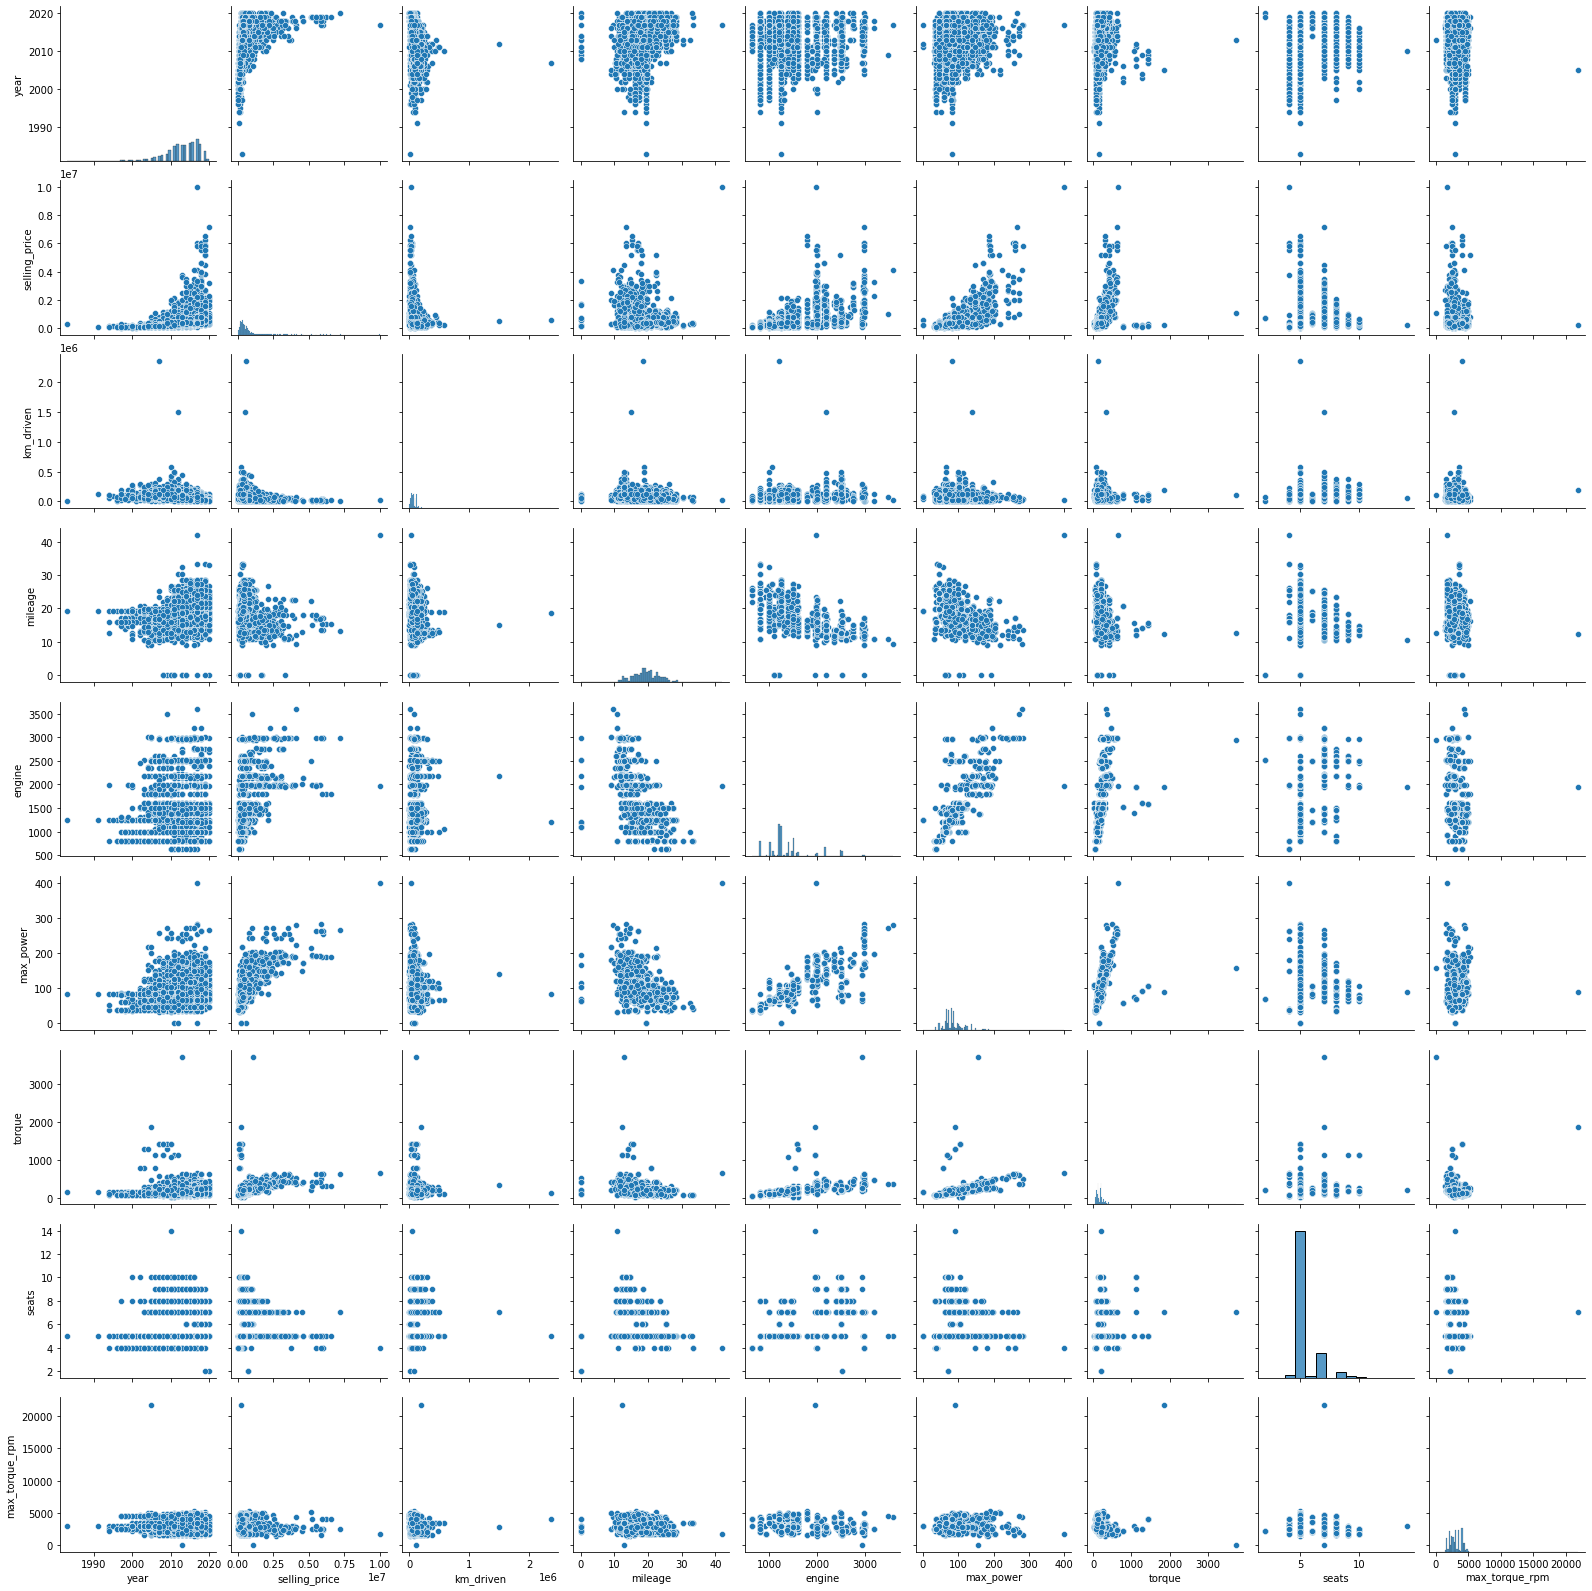

In [34]:
sns.pairplot(df_train)
plt.show;

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной? <br>  </font>
 <font color='#FF6670'> **Ответ:** рапсределение фичей с целевой переменной нигде не напоминает вертикальную прямую, что говорит о (как минимум) наличии какой-то зависимости. Нельзя сказать, что характер зависимости един для всех признаков. </font>
* <font color='#FF6600'> А о корреляциях признаков?<br> </font>
 <font color='#FF6670'> **Ответ:** бросающиеся в глаза графики, позволяющие заподозрить корреляцию между признаками - это парные графики engine и max_power.</font>


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?" <br> </font>

<font color='#FF6670'> **Ответ:** Да, распределения очень похожи, только в тестовой выборке разброс значений меньше (что логично).</font>


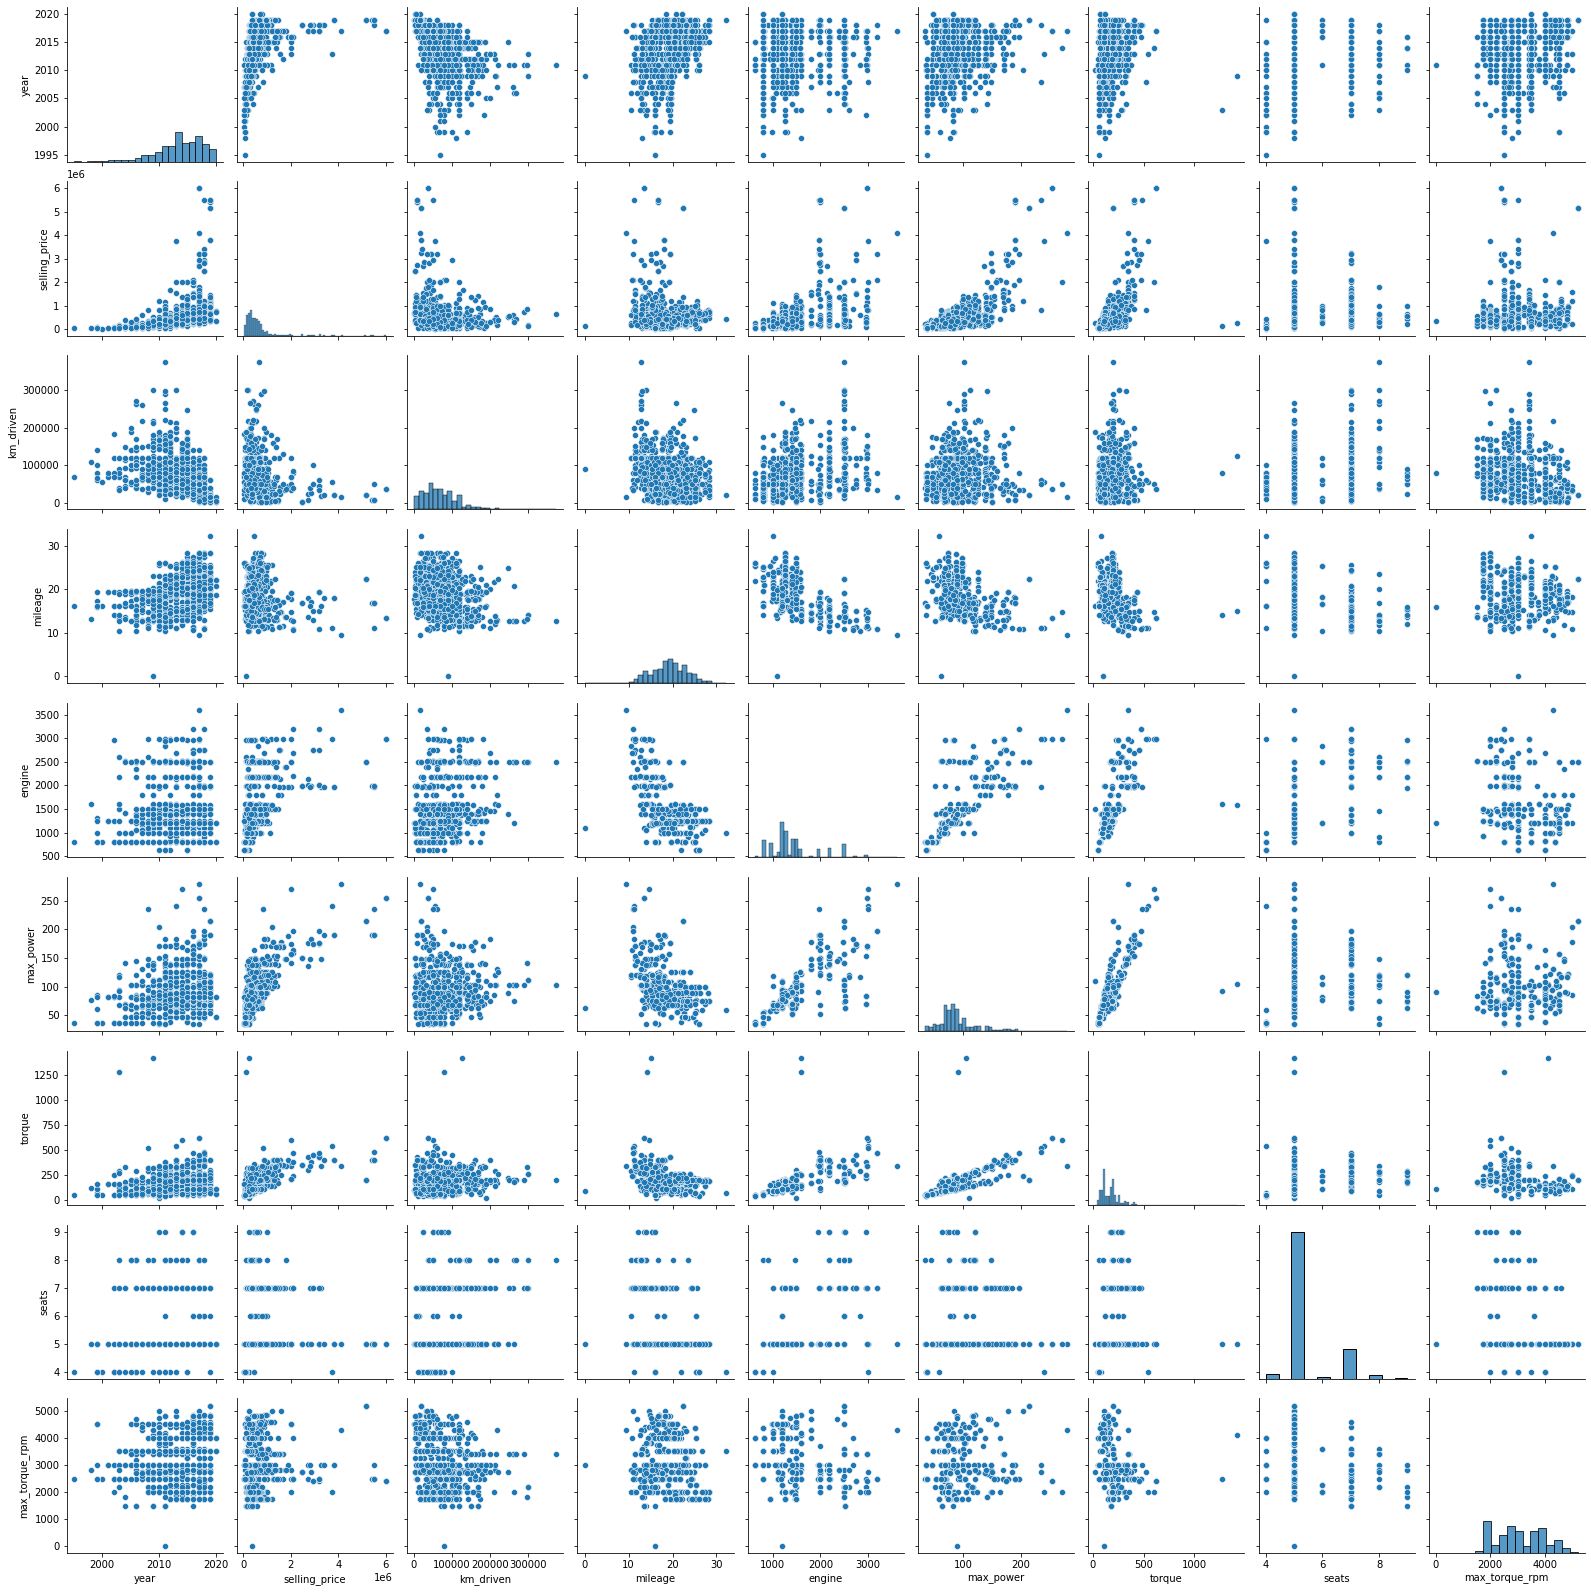

In [35]:
sns.pairplot(df_test)
plt.show;

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

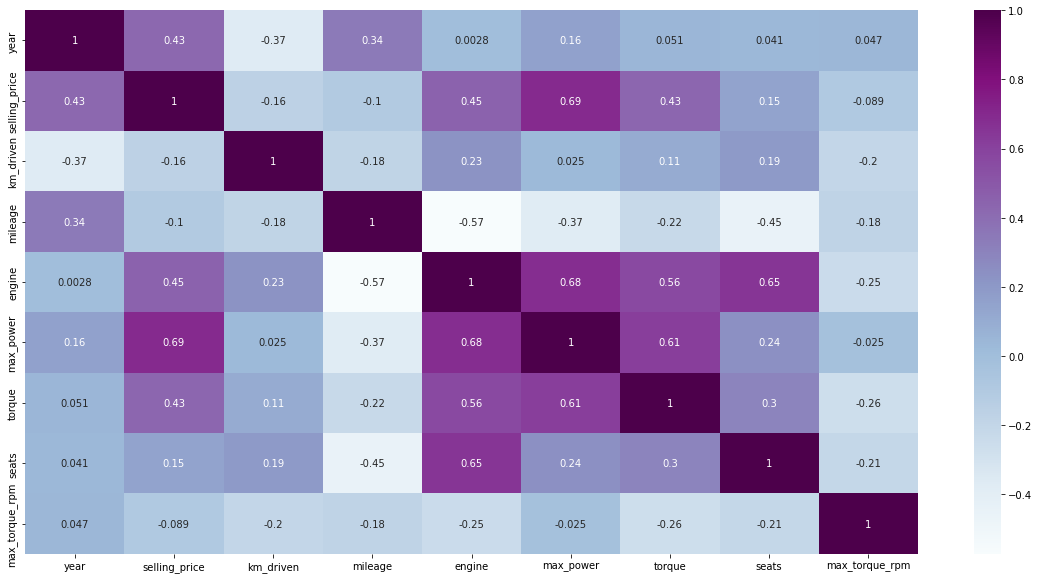

In [36]:
plt.figure(figsize=(20,10))

sns.heatmap(df_train.corr(numeric_only = True),  cmap='BuPu', annot=True) 
plt.show();

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font> <br>
<font color='#FF6670'> **Ответ:** engine и year </font> <br>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font> <br>
<font color='#FF6670'> **Ответ:** max_power и selling_price </font> <br>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font> <br>
<font color='#FF6670'> **Ответ:** вообще опираясь на корреляцию ни о каких причинно-следственных связях утврждать нельзя, но можно увидеть, что меньшие года наблюдаются вместе с большим километрожом и наоборот. </font> <br>

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

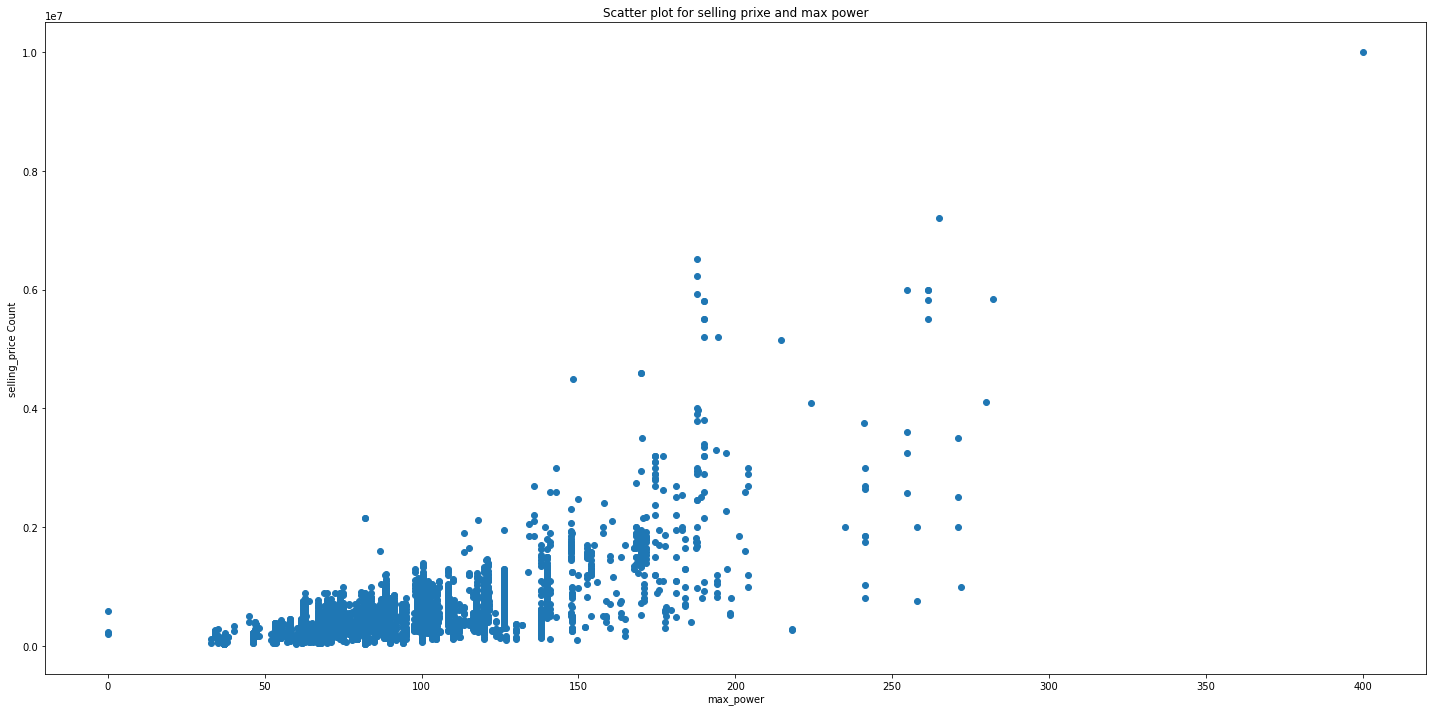

In [37]:

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(df_train['max_power'], df_train['selling_price'])
ax.set(xlabel='max_power', ylabel="selling_price Count", title='Scatter plot for selling prixe and max power')
fig.tight_layout()
plt.show;

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<font color='#FF6670'> Уже на графике выше можно было заметить, что в данных есть выбросы. Поэтому хорошо бы построить box plots и, как минимум,  посмотреть на них. </font>

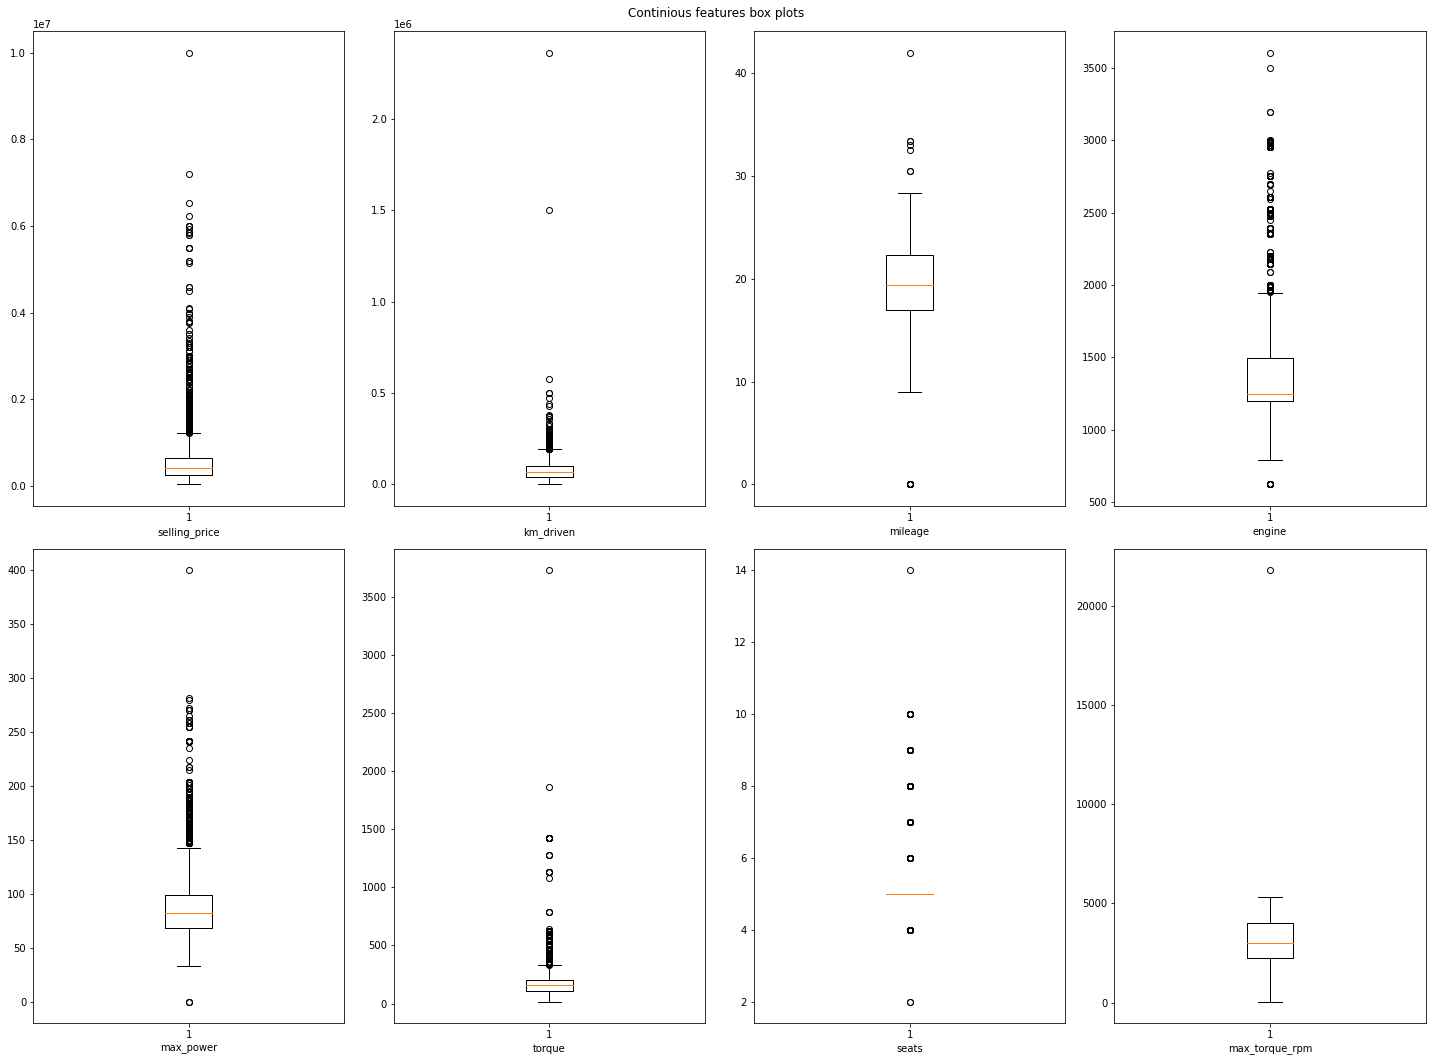

In [38]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 15))

fig.suptitle('Continious features box plots')

cols = ['selling_price' ,'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

for col, ax in zip(cols, axs.ravel()):

    ax.boxplot(np.array(df_train[f'{col}']))
    ax.set(xlabel=col)


plt.tight_layout()
plt.show();

<font color='#FF6670'>Видно, что в данных достаточно много выбросов. Где-то это даже можнт быть ошибкой (например, max_torque_rpm - всего одна точка аутлаера, вполне может быть просто ошибкой) <\font>

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [39]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price', 'year'])

In [40]:
assert X_train.shape == (5840, 7) # добавила одну колонку после работы с torque

In [41]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price', 'year'])

In [42]:
assert X_test.shape == (1000, 7)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print(f'Train R-squared: {r2_score(y_train, pred_train)}', f'Train MSE: {MSE(y_train, pred_train)}', 
      f'Test R-squared: {r2_score(y_test, pred_test)}',  f'Test MSE: {MSE(y_test, pred_test)}', sep='\n')

Train R-squared: 0.5416400631203205
Train MSE: 131383530677.01707
Test R-squared: 0.569725322669661
Test MSE: 247334171297.5965


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

# y_train = pd.DataFrame(scaler.transform(y_train.values.reshape(-1,1)))
# y_test = pd.DataFrame(scaler.transform(y_test.values.reshape(-1,1)))

In [45]:
X_test

,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,1.565740,-1.362605,2.200379,0.761548,0.722250,1.601702,-0.928303
1,-0.814974,0.519155,0.139102,0.650920,0.722250,-0.434419,-0.324553
2,2.405866,-1.638596,0.760986,1.330489,-0.030448,-0.434419,1.376926
3,1.648982,1.422399,0.141162,0.338003,0.209046,-0.434419,-1.422281
4,-0.065798,-0.735352,-0.530144,-0.724021,-0.680506,-0.434419,-0.050121
...,...,...,...,...,...,...,...
995,0.433652,0.095132,-0.707236,-0.627617,-0.654504,-0.434419,1.596471
996,-0.398765,-0.208459,-0.478663,-0.192061,-0.520558,-0.434419,1.047607
997,-0.565249,0.895506,-0.068879,0.066175,0.377283,-0.434419,-0.324553
998,-0.814974,0.233127,-0.478663,-0.284672,-0.545363,-0.434419,1.047607


<font color='#FF6670'> Делюсь открытием и болью: в данном случае стандартизация **у** приводит к занулению всех фичей в любой модели с регуляризацией. Я долго не могла понять, почему веса зануляются, а ни у кого такого нет ))) Хотя это логично, околонулевые X и околонулевой у неминуемо приведут к околонулевым весам.</font>

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print(f'Train R-squared: {r2_score(y_train, pred_train)}', f'Train MSE: {MSE(y_train, pred_train)}', 
      f'Test R-squared: {r2_score(y_test, pred_test)}',  f'Test MSE: {MSE(y_test, pred_test)}', sep='\n')

Train R-squared: 0.5416400631203205
Train MSE: 131383530677.01707
Test R-squared: 0.569725322669661
Test MSE: 247334171297.59647


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [47]:
dict(zip(X_train, lr.coef_))

{'km_driven': -99407.20602874501,
 'mileage': 92616.2102639352,
 'engine': 45258.76597358192,
 'max_power': 375442.3900392792,
 'torque': -4531.4018205477405,
 'seats': 15337.918630005737,
 'max_torque_rpm': -29101.111699991514}

<font color='#FF6670'> Наибольшим коэффициентом обладает признак max_power: при повышении значения этого признака на 1 ед. цена автомобиля вырастает на 375442 (доллара?)</font>

<font color='#FF6670'> Однако необходимо также учитывать значимость: </font>

In [48]:
import statsmodels.api as sm

ols = sm.OLS(y_train.values, X_train)
ols_est = ols.fit()
print(ols_est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.277
Model:                            OLS   Adj. R-squared (uncentered):              0.276
Method:                 Least Squares   F-statistic:                              319.5
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                        0.00
Time:                        21:17:29   Log-Likelihood:                         -86329.
No. Observations:                5840   AIC:                                  1.727e+05
Df Residuals:                    5833   BIC:                                  1.727e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

<font color='#FF6670'> * Видно, что max_power действительно значим, а незначимым является torque и seats</font>

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [49]:
from sklearn.linear_model import Lasso

lr = Lasso()
lr.fit(X_train, y_train)
print(lr.coef_)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print(f'Train R-squared: {r2_score(y_train, pred_train)}', f'Train MSE: {MSE(y_train, pred_train)}',
      f'Test R-squared: {r2_score(y_test, pred_test)}',  f'Test MSE: {MSE(y_test, pred_test)}', sep='\n')

[-99406.10441727  92613.9458477   45257.30618609 375439.71582978
  -4527.82819238  15336.44201979 -29100.08721085]
Train R-squared: 0.541640063073648
Train MSE: 131383530690.39523
Test R-squared: 0.5697244508741011
Test MSE: 247334672430.579


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

<font color='#FF6670'> Регрессия не занулила никакие веса, так как alpha недостаточно большая (=1)</font>

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [50]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':np.arange(1,1000,100), 'max_iter':np.arange(1000,10100,500)}
lr = Lasso()
gd = GridSearchCV(lr, parameters, cv = 10, scoring = 'r2')
gd.fit(X_train, y_train)

gd.best_estimator_

Lasso(alpha=901)

In [51]:
pred_train = gd.best_estimator_.predict(X_train)
pred_test  = gd.best_estimator_.predict(X_test)

print(f'Train R-squared: {r2_score(y_train, pred_train)}', f'Train MSE: {MSE(y_train, pred_train)}',
      f'Test R-squared: {r2_score(y_test, pred_test)}',  f'Test MSE: {MSE(y_test, pred_test)}', sep='\n')

Train R-squared: 0.5416013194696652
Train MSE: 131394636092.66289
Test R-squared: 0.5689214841182619
Test MSE: 247796240651.06372


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [52]:
from sklearn.model_selection import ParameterGrid

grid = ParameterGrid(parameters)
k = 10 #кол-во фолдов
print (f"The total number of parameters-combinations is: {k*len(grid)}")

The total number of parameters-combinations is: 1900


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [53]:
gd.best_estimator_.coef_

array([-98406.37700225,  90457.87023677,  43714.02840886, 373123.28767202,
        -1310.78248524,  14061.69115914, -28240.27894933])

<font color='#FF6670'> У лучшей из моделей aplpha=901 и никакие веса не занулены</font>

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [54]:
from sklearn.linear_model import ElasticNet

parameters = {'alpha':np.arange(1,1000,100), 'max_iter':np.arange(1000,1100,500),}
lr = ElasticNet()
gd = GridSearchCV(lr, parameters, cv = 10, scoring = 'r2')
gd.fit(X_train, y_train)

gd.best_estimator_

ElasticNet(alpha=1)

In [55]:
pred_train = gd.best_estimator_.predict(X_train)
pred_test  = gd.best_estimator_.predict(X_test)

print(f'Train R-squared: {r2_score(y_train, pred_train)}', f'Train MSE: {MSE(y_train, pred_train)}',
      f'Test R-squared: {r2_score(y_test, pred_test)}',  f'Test MSE: {MSE(y_test, pred_test)}', sep='\n')

Train R-squared: 0.482173268254088
Train MSE: 148428993944.94327
Test R-squared: 0.45675212736833404
Test MSE: 312274389978.5181


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

<font color='#FF6670'> alpha=1 </font>

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [56]:
X_train_cat = pd.concat([X_train.reset_index(drop=True), df_train[['year', 'fuel', 'seller_type', 'transmission', 'owner']].reset_index(drop=True)], axis=1)

In [57]:
assert X_train_cat.shape == (5840, 12)

In [58]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### Сделаем то же самое для теста (пригодится)

In [59]:
X_test_cat = pd.concat([X_test.reset_index(drop=True), df_test[['year', 'fuel', 'seller_type', 'transmission', 'owner']].reset_index(drop=True)], axis=1)
X_test_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,534,837,877,623


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [60]:
from sklearn.preprocessing import OneHotEncoder
enc1 = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# я создаю временные датафреймы, потому что потом буду кодировать все вместе (в т.ч. с новыми призками, которые создам дальше, чтобы не кодировтаь два раза)
X_train_cat_temp = pd.concat([X_train_cat.drop(columns=['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']), pd.DataFrame(enc1.fit_transform(X_train_cat[['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']]))], axis=1)
X_test_cat_temp = pd.concat([X_test_cat.drop(columns=['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']), pd.DataFrame(enc1.transform(X_test_cat[['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']]))], axis=1)

In [61]:
X_train_cat_temp.columns = X_train_cat_temp.columns.astype('str')
X_test_cat_temp.columns = X_test_cat_temp.columns.astype('str')

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [62]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

lr = Ridge()

parameters = {'alpha':np.arange(0,200,10)}
gd = GridSearchCV(lr, parameters, cv = 10, scoring = 'r2')
gd.fit(X_train_cat_temp, y_train)

gd.best_estimator_

Ridge(alpha=10)

In [63]:
best = gd.best_estimator_
pred_train = best.predict(X_train_cat_temp)
pred_test = best.predict(X_test_cat_temp)

print(f'Train R-squared: {r2_score(y_train, pred_train)}', f'Train MSE: {MSE(y_train, pred_train)}', 
      f'Test R-squared: {r2_score(y_test, pred_test)}',  f'Test MSE: {MSE(y_test, pred_test)}', sep='\n')

# да, R2 удалось повысить на несколько процентов!

Train R-squared: 0.6760750843135864
Train MSE: 92849299585.07208
Test R-squared: 0.6662415354905231
Test MSE: 191853896086.08762


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

### Генерируем новые признаки из имеющихся

<font color='#FF6670'> Интуитивно кажется, что есть смысл взять произведение torque и max_torque_rpm, так как по сути признаки про разные грани одного и того же и интересно посмотреть, какое влияние они окажут во взаимодействии </font>

In [64]:
X_train_cat_temp['new_torque'] = X_train_cat_temp['torque']*X_train_cat_temp['max_torque_rpm']
X_test_cat_temp['new_torque'] = X_test_cat_temp['torque']*X_test_cat_temp['max_torque_rpm']

In [65]:
best = gd.best_estimator_
best.fit(X_train_cat_temp, y_train)
pred_train = best.predict(X_train_cat_temp)
pred_test = best.predict(X_test_cat_temp)

print(f'Train R-squared: {r2_score(y_train, pred_train)}', f'Train MSE: {MSE(y_train, pred_train)}', 
      f'Test R-squared: {r2_score(y_test, pred_test)}',  f'Test MSE: {MSE(y_test, pred_test)}', sep='\n')

# R2 очень незначительно вырос 


Train R-squared: 0.6769849838312989
Train MSE: 92588487499.24234
Test R-squared: 0.6668610257654606
Test MSE: 191497795386.1132


### Придумываем новые признаки

<font color='#FF6670'>Попробуем вытащить марку авто из переменной name</font>

In [66]:
def brand(s: str):
    w = s.split(' ')
    return w[0]

brands = df_train['name'].apply(brand)
brands.unique()

array(['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Isuzu', 'Peugeot'], dtype=object)

In [67]:
X_train_cat['brand'] = df_train['name'].apply(brand)
X_test_cat['brand'] = df_test['name'].apply(brand)

<font color='#FF6670'>Судя по списку вытащить первое слово из name оказалось достаточным. Теперь сделаем из нее - категориальную фичу и заодно добавим то, что временно создавали до этого, чтобы потом сохранить верные веса.</font>

In [68]:
X_train_cat['new_torque'] = X_train_cat['torque']*X_train_cat['max_torque_rpm']
X_test_cat['new_torque'] = X_test_cat['torque']*X_test_cat['max_torque_rpm']

In [69]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_cat = pd.concat([X_train_cat.drop(columns=['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats','brand']), pd.DataFrame(enc.fit_transform(X_train_cat[['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats', 'brand']]))], axis=1)

with open('encoder.pkl', 'wb') as files:
    pickle.dump(enc, files)
X_test_cat = pd.concat([X_test_cat.drop(columns=['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats', 'brand']), pd.DataFrame(enc.transform(X_test_cat[['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats', 'brand']]))], axis=1)


c:\Users\mi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [70]:
X_train_cat.columns = X_train_cat.columns.astype(str)
X_test_cat.columns = X_test_cat.columns.astype(str)

In [71]:
X_train_cat

,km_driven,mileage,engine,max_power,torque,max_torque_rpm,new_torque,0,1,2,...,66,67,68,69,70,71,72,73,74,75
0,1.191152,0.995867,-0.373643,-0.439550,0.123513,-1.147849,-0.141774,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.766619,0.428830,0.141162,0.493513,0.636716,-0.598985,-0.381383,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.883158,0.895506,-0.068879,0.066175,0.377283,-0.324553,-0.122448,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.766619,-0.835712,-0.270682,0.009281,-0.537011,1.596471,-0.857322,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.482007,0.177929,-0.478663,-0.191113,-0.528684,1.047607,-0.553853,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,1.948653,-0.379072,-0.707236,-0.815684,-0.679651,-0.050121,0.034065,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,-0.398765,-0.133189,-0.888447,-0.657645,-0.731827,0.498743,-0.364994,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5837,0.600136,-0.233549,-0.478663,-0.159821,-0.529111,1.047607,-0.554301,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5838,0.749971,-0.660081,0.130865,0.698332,0.511491,-0.324553,-0.166006,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
best = gd.best_estimator_
best.fit(X_train_cat, y_train)
pred_train = best.predict(X_train_cat)
pred_test = best.predict(X_test_cat)

print(f'Train R-squared: {r2_score(y_train, pred_train)}', f'Train MSE: {MSE(y_train, pred_train)}', 
      f'Test R-squared: {r2_score(y_test, pred_test)}',  f'Test MSE: {MSE(y_test, pred_test)}', sep='\n')

# R2 еще вырос 

with open('model_pkl', 'wb') as files:
    pickle.dump(best, files)

Train R-squared: 0.685044137170892
Train MSE: 90278425177.40996
Test R-squared: 0.7063132681640509
Test MSE: 168819519871.43372


### Работаем с имеющимися данными

<font color='#FF6670'> Вспоминаем box plots и выбросы. Почистим ну самые выделяющиеся аутлаеры. </font>

In [73]:
def clean_outliers(col: pd.Series):
    q1, q3 = np.percentile(col, [5, 95]) # я взяла прям чуть-чуть, чтобы не убирать много наблюдений
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    idxs = col[(col < lower_bound) | (col > upper_bound)].index
    return idxs

exclude = list()
for col in X_train_cat.columns[:8]:
    for x in clean_outliers(X_train_cat[col]).values:
        exclude.append(x)

X_train_cat.reset_index(drop=True, inplace=True)
X_train_cat = X_train_cat[~X_train_cat.index.isin(exclude)]
y_train.reset_index(drop=True, inplace=True)
y_train = y_train[~y_train.index.isin(exclude)]

In [74]:
best = gd.best_estimator_
best.fit(X_train_cat, y_train)
pred_train = best.predict(X_train_cat)
pred_test = best.predict(X_test_cat)

print(f'Train R-squared: {r2_score(y_train, pred_train)}', f'Train MSE: {MSE(y_train, pred_train)}', 
      f'Test R-squared: {r2_score(y_test, pred_test)}',  f'Test MSE: {MSE(y_test, pred_test)}', sep='\n')

# R2 вырос на трейне, но на тесте упал, поэтому финальную лучшую модель оставляю без удаления выбросов 

Train R-squared: 0.6877571866917154
Train MSE: 80863761943.09224
Test R-squared: 0.6751336959859868
Test MSE: 186742428311.97495


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [75]:
def business_metrics(y_true, y_pred):
    perc = list()
    for i in range(len(y_true)):
        if (y_true[i] - y_pred[i])/y_true[i] <= 0.1:
            perc.append(1)
    return len(perc)/len(y_true)

business_metrics(y_test, pred_test)

0.566

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [76]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float
    


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

In [77]:
import requests
import json
url = 'http://127.0.0.1:8000/predict_item'
params = {'name':'Mahindra Xylo E4 BS IV', 'year':2010, 'km_driven':168000, 'fuel':'Diesel',
       'seller_type':'Individual', 'transmission': 'Manual', 'owner':'First Owner','mileage': '14.0 kmpl','engine': '2498 CC',
      'max_power': '112 bhp','torque': '260 Nm at 1800-2200 rpm','seats': 7.0}
# params = {'item': ['Mahindra Xylo E4 BS IV', 2010, 168000]}
r = requests.post(url, data=json.dumps(params))
r.text

'609052.7812605891'

In [78]:
pred_test[0] #предсказания здесь и через api совпадают!

609052.7812605893

In [90]:
test_csv = pd.read_csv(r'test_csv_api.csv')
test = test_csv.replace({float('nan'): None, '':None})
test = test.to_dict(orient="records")
test

[{'name': 'Mahindra Xylo E4 BS IV',
  'year': 2010,
  'km_driven': 168000,
  'fuel': 'Diesel',
  'seller_type': 'Individual',
  'transmission': 'Manual',
  'owner': 'First Owner',
  'mileage': '14.0 kmpl',
  'engine': '2498 CC',
  'max_power': '112 bhp',
  'torque': '260 Nm at 1800-2200 rpm',
  'seats': 7.0},
 {'name': 'Tata Nexon 1.5 Revotorq XE',
  'year': 2017,
  'km_driven': 25000,
  'fuel': 'Diesel',
  'seller_type': 'Individual',
  'transmission': 'Manual',
  'owner': 'First Owner',
  'mileage': '21.5 kmpl',
  'engine': '1497 CC',
  'max_power': '108.5 bhp',
  'torque': '260Nm@ 1500-2750rpm',
  'seats': 5.0},
 {'name': 'Honda Civic 1.8 S AT',
  'year': 2007,
  'km_driven': 218463,
  'fuel': 'Petrol',
  'seller_type': 'Individual',
  'transmission': 'Automatic',
  'owner': 'First Owner',
  'mileage': '12.9 kmpl',
  'engine': '1799 CC',
  'max_power': '130 bhp',
  'torque': '172Nm@ 4300rpm',
  'seats': 5.0},
 {'name': 'Honda City i DTEC VX',
  'year': 2015,
  'km_driven': 173000,
 

In [91]:
import csv
csv_file = r'test_csv_api.csv'
files={'report.csv': csv_file}

import requests
import json
url = 'http://127.0.0.1:8000/predict_items'

myFile = open(csv_file, 'r')
reader = csv.DictReader(myFile)
l = list()
for d in reader:
    l.append(d)
js = {'objects': test}
r = requests.post(url, data=json.dumps(js))

r.text

'[{"name":"Mahindra Xylo E4 BS IV","year":2010,"km_driven":168000,"fuel":"Diesel","seller_type":"Individual","transmission":"Manual","owner":"First Owner","mileage":"14.0 kmpl","engine":"2498 CC","max_power":"112 bhp","torque":"260 Nm at 1800-2200 rpm","seats":7.0,"predictions":609052.7812605893},{"name":"Tata Nexon 1.5 Revotorq XE","year":2017,"km_driven":25000,"fuel":"Diesel","seller_type":"Individual","transmission":"Manual","owner":"First Owner","mileage":"21.5 kmpl","engine":"1497 CC","max_power":"108.5 bhp","torque":"260Nm@ 1500-2750rpm","seats":5.0,"predictions":923568.2700507848},{"name":"Honda Civic 1.8 S AT","year":2007,"km_driven":218463,"fuel":"Petrol","seller_type":"Individual","transmission":"Automatic","owner":"First Owner","mileage":"12.9 kmpl","engine":"1799 CC","max_power":"130 bhp","torque":"172Nm@ 4300rpm","seats":5.0,"predictions":669704.9607566153},{"name":"Honda City i DTEC VX","year":2015,"km_driven":173000,"fuel":"Diesel","seller_type":"Individual","transmissio

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link